In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib agg

import visualization
from data import datasets, evaluation
import transformations
import jax
import jax.numpy as jnp
import flax.linen as nn
from flax.core import freeze
import optax
import inference
from utils import settings

rng_key = jax.random.PRNGKey(0)

In [2]:
dataset = datasets.Izmailov()
#dataset = datasets.Sinusoidal()

In [3]:
model_transformation = transformations.Sequential([
    nn.Dense(16),
    nn.tanh,
    nn.Dense(1)
])

In [4]:
rng_key, rng_key_ = jax.random.split(rng_key)
parameters = {
    "transformation": model_transformation.init(rng_key_, dataset[0][0]),
    "log_std": 0.0
}

In [5]:
# optimization
optimizer = optax.adam(learning_rate=0.001)

parameters, optimizer_state = inference.point_estimate(
    transformation=model_transformation,
    loss_function=inference.ridge_loss,
    parameters=parameters,
    dataset=dataset,
    epochs=4001,
    optimizer=optimizer,
    report_at=100
)

epoch 0 loss: 72.4175796508789
epoch 100 loss: 24.025501251220703
epoch 200 loss: -32.52408218383789
epoch 300 loss: -95.95073699951172
epoch 400 loss: -143.14736938476562
epoch 500 loss: -185.00685119628906
epoch 600 loss: -224.5830841064453
epoch 700 loss: -262.2507629394531
epoch 800 loss: -298.1024169921875
epoch 900 loss: -332.1289978027344
epoch 1000 loss: -364.2760009765625
epoch 1100 loss: -394.4534606933594
epoch 1200 loss: -422.5329895019531
epoch 1300 loss: -448.3885803222656
epoch 1400 loss: -472.0282287597656
epoch 1500 loss: -493.51092529296875
epoch 1600 loss: -512.5220336914062
epoch 1700 loss: -528.947509765625
epoch 1800 loss: -543.3970947265625
epoch 1900 loss: -556.377685546875
epoch 2000 loss: -567.681396484375
epoch 2100 loss: -576.8665771484375
epoch 2200 loss: -584.1306762695312
epoch 2300 loss: -589.9627685546875
epoch 2400 loss: -594.427490234375
epoch 2500 loss: -597.7115478515625
epoch 2600 loss: -600.173583984375
epoch 2700 loss: -602.07080078125
epoch 2800

[[-0.17412196 -0.17247376  0.17192626  0.26754424  0.17573065 -1.5346704
  -0.1790924  -0.8253782   0.2534658   0.842694    0.29867858  0.02007787
   0.09585898  0.00340311  0.19816263  0.11137915 -0.15151574 -0.13881058
   0.12762271  0.46622205  0.153843   -2.5089529  -0.18335508  1.4831903
   0.4418061  -2.6992178   0.6281923   0.12645388  0.10808835 -0.1303902
   0.32628858  0.11864181 -0.385168    0.1756121   0.17784443 -0.18076837
  -0.29932702 -0.17666951 -1.6452835   0.1716566  -1.1797965  -0.2771717
  -1.2043945  -0.46491402  0.18275805  0.17620094 -0.17432413 -0.18498608
   0.2299232 ]]
(128, 1) (1, 49)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.47it/s]


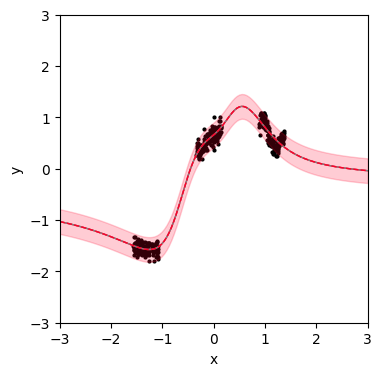

In [6]:
parameters_transformation = jax.tree_util.tree_reduce(lambda a, b: jnp.concatenate([a.flatten(), b.flatten()]), parameters["transformation"])[jnp.newaxis]
print(parameters_transformation)

figure = visualization.RegressionFigure(
    settings=settings.SettingsRegressionFigure(
        settings_plot=settings.SettingsPlot(
            alpha=1.0,
            aleatoric=True
        )
    ),
)
figure.plot(dataset=dataset, transformation=model_transformation.apply_from_vector, parameters_list=[parameters_transformation], std=jnp.exp(parameters["log_std"]))